In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

pd.set_option('display.max_rows', None)
df_wpm = pd.read_csv('~/SpeedTyping/wpmdaily.csv')

In [5]:
df_wpm.head(3)

,rank,name,wpm,raw,accuracy,consistency
0,1,LeaFy,236.00,254.20,96.22,89.43
1,2,hennyyy,201.59,223.79,93.75,86.64
2,3,Valorance,193.00,201.60,96.75,87.54


In [6]:
def functext(f):
    import inspect
    print(inspect.getsource(f))

<function matplotlib.pyplot.show(close=None, block=None)>

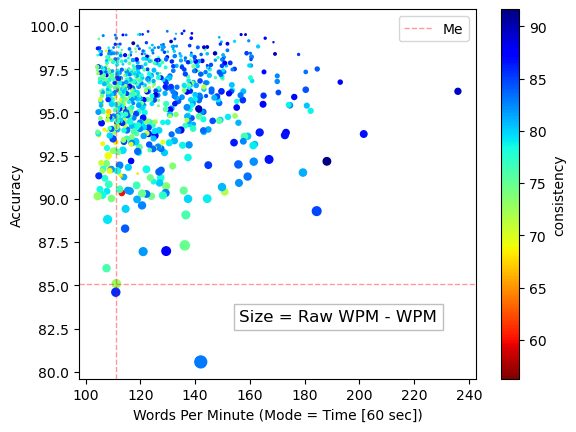

In [7]:
plt.scatter(df_wpm.wpm,df_wpm.accuracy,df_wpm.raw-df_wpm.wpm,c=df_wpm.consistency,cmap='jet_r')
cbar=plt.colorbar()
cbar.set_label('consistency')
plt.xlabel('Words Per Minute (Mode = Time [60 sec])')
plt.ylabel('Accuracy')
myx = df_wpm.loc[df_wpm['name'] == 'DadeMurphy', 'wpm'].values[0]
myy = df_wpm.loc[df_wpm['name'] == 'DadeMurphy', 'accuracy'].values[0]
plt.axvline(myx, color='red', linestyle='--', alpha = .4,linewidth= 1,label='Me')
plt.axhline(myy, color='red', linestyle='--', alpha = .4,linewidth= 1)
plt.legend()
plt.figtext(
    x=0.53, y=.23,  # x=0.5 centers it, y=-0.1 places it below the x-axis
    s="Size = Raw WPM - WPM",
    fontsize=12, color="black", ha="center",
    bbox=dict(facecolor="white", alpha=0.5, edgecolor="gray")
)
plt.show

In [8]:
def binnify(df,bincol,statcol,bin_size):
    dfp = df.copy()
    dfp['bin'] = pd.cut(dfp[bincol], bins=range(int(dfp[bincol].min()), int(dfp[bincol].max())+1+ bin_size, bin_size))

    # Define the statistics you want to calculate
    stats = {
        'mean': 'mean',
        'min': 'min',
        'max': 'max',
        'med': 'median',
        'cnt': 'count',
        'std': 'std'
    }                         
    
    # Initialize the merged DataFrame with the 'bin' column
    merged_df = dfp.groupby('bin', observed=False).size().reset_index().rename(columns={0: 'size'}).drop(columns=['size'])

    for stat_name, func in stats.items():
            stat_df = dfp.groupby('bin', observed=False)[statcol].agg(func).round(1).reset_index().rename(columns={statcol: stat_name})
            #print(f"Shape of {stat_name} DataFrame: {stat_df.shape}")  # Debugging line
            merged_df = merged_df.merge(stat_df, on='bin', how='left')
    merged_df['b'] = [int(interval.left) for interval in dfp['bin'].cat.categories]
    merged_df = merged_df[merged_df['cnt'] > 0]
    
    return merged_df.reset_index(drop=True)

In [9]:
def statbox(df,bincol,statcol,bin_size):
    
    dfp = df.copy()
    dfp['bin'] = pd.cut(dfp[bincol], bins=range(int(dfp[bincol].min()), int(dfp[bincol].max()) + bin_size, bin_size))
    merged_df = binnify(dfp,bincol,statcol,bin_size)
    xwidths = [(w / max(list(merged_df.cnt)))**.8 for w in list(merged_df.cnt)]

    plt.figure(figsize=(10, 6))
    box_plot = sns.boxplot(x='bin', y=statcol, data=dfp, width=xwidths)
    plt.title(f'Box plot of {statcol} by {bincol} with bin size {bin_size}')
    plt.xlabel(bincol)
    plt.ylabel(statcol)
    bin_labels = [f'{int(interval.left)}' for interval in dfp['bin'].cat.categories]

    ex=0
    if bin_size > 2:
        ex=bin_size-2
    
    less_labels = bin_labels[0:len(bin_labels):int((2+ex)/bin_size)]
    plt.xticks(ticks=range(0,len(bin_labels),int((2+ex)/bin_size)), labels=less_labels, rotation=90,fontsize = 6,fontweight='bold')
    
    myacc = int(dfp.loc[dfp['name'] == 'DadeMurphy', bincol].values[0])
    minacc = int(dfp[bincol].min())
     
    myx= int(myacc-minacc)//bin_size
    myy = dfp.loc[df['name'] == 'DadeMurphy', statcol].values[0]
    plt.axvline(myx, color='red', linestyle='--', alpha = .4,linewidth= 1,label='Me')
    plt.axhline(myy, color='red', linestyle='--', alpha = .4,linewidth= 1)
    
    plt.show()


In [10]:
df_wpm.head(3)

,rank,name,wpm,raw,accuracy,consistency
0,1,LeaFy,236.00,254.20,96.22,89.43
1,2,hennyyy,201.59,223.79,93.75,86.64
2,3,Valorance,193.00,201.60,96.75,87.54


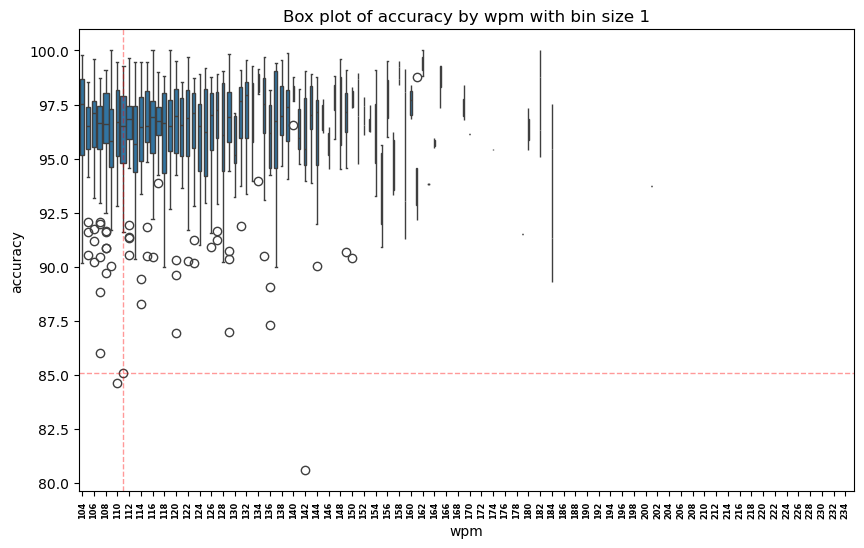

In [11]:
statbox(df_wpm,'wpm','accuracy',1)

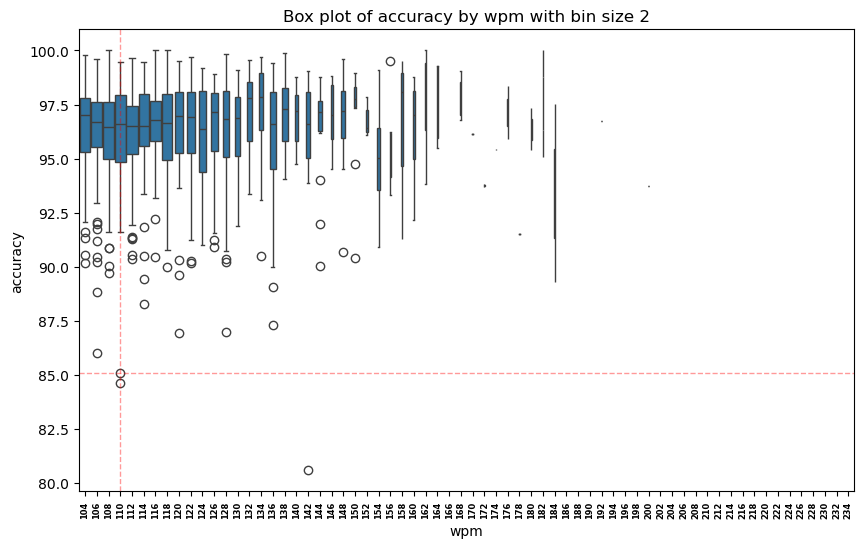

In [12]:
statbox(df_wpm,'wpm','accuracy',2)

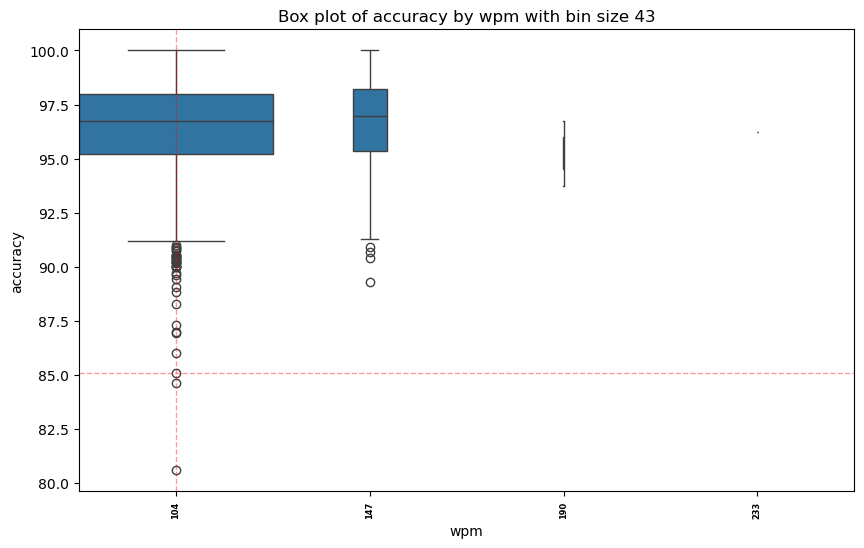

In [13]:
statbox(df_wpm,'wpm','accuracy',43)

In [14]:
df_wpm.head(3)

,rank,name,wpm,raw,accuracy,consistency
0,1,LeaFy,236.00,254.20,96.22,89.43
1,2,hennyyy,201.59,223.79,93.75,86.64
2,3,Valorance,193.00,201.60,96.75,87.54


In [172]:
def plothisto(df,statcol,filt=""):
    # Plot histogram
    print(f"int(df[statcol].max()-df[statcol].min()) = {(int(df[statcol].max()-df[statcol].min()))}")
    plt.figure(figsize=(10, 6))
    plt.gca().set_facecolor((0.0, .10, .10, 0.95))
    sns.histplot(df[statcol], bins=int(df[statcol].max()-df[statcol].min()), color = '.8', kde=True)
    plt.title(f'Histogram of {statcol} {filt}')
    plt.xlabel(statcol)
    plt.ylabel('Frequency')

    # Calculate mean and standard deviation of the "accuracy" column
    mean_st= df[statcol].mean()
    std_dev_st = df[statcol].std()
    
    plt.axvline(mean_st, color='yellow', linestyle='-', linewidth=1, label='Mean')

    myval = df_wpm.loc[df_wpm['name'] == 'DadeMurphy', statcol].values[0]
    plt.axvline(myval, color='lime', linestyle='-',linewidth=1, label='Me')

    mxdev = 5
    # Adding standard deviation lines
    for i in range(1, mxdev+1):
        plt.axvline(mean_st + i*std_dev_st, color='white',alpha=.8, linestyle=':',linewidth=.5*((mxdev+1)-i)**.48, label=f'{i}σ')
        plt.axvline(mean_st - i*std_dev_st, color='white',alpha=.8, linestyle=':',linewidth=.5*((mxdev+1)-i)**.48)


    plt.legend(facecolor=(.50, .41,.3, 0.15), edgecolor='black')

    

    # Set x-ticks to align with standard deviation thresholds
    std_devs = [mean_st + i*std_dev_st for i in range(-mxdev, mxdev+1)]
    plt.xticks(std_devs, [f'{mean_st + i*std_dev_st:.2f}' for i in range(-mxdev, mxdev+1)])
    plt.xlim(df[statcol].min()-2,df[statcol].max()+1)

    
    plt.show()

int(df[statcol].max()-df[statcol].min()) = 19


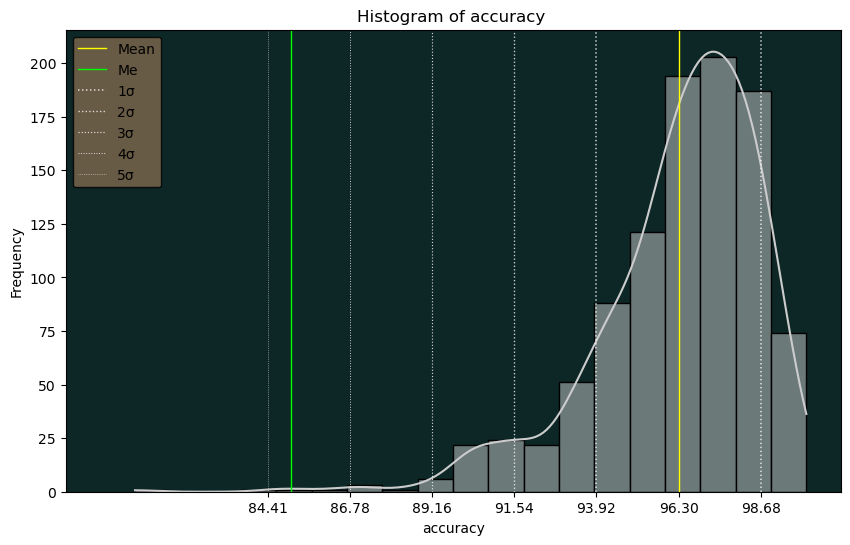

In [173]:
plothisto(df_wpm,'accuracy')

int(df[statcol].max()-df[statcol].min()) = 35


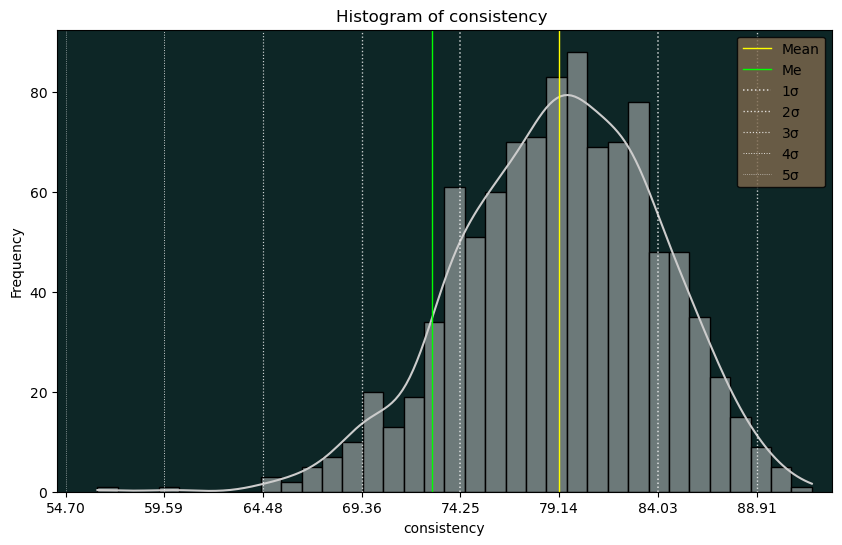

In [175]:
plothisto(df_wpm,'consistency')

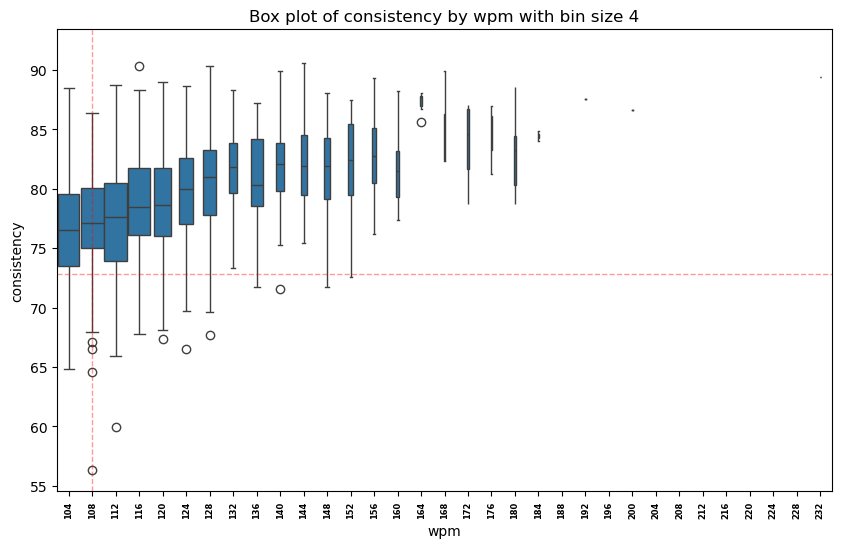

In [176]:
statbox(df_wpm,'wpm','consistency',4)

In [177]:
df_wpm['diff'] = df_wpm.wpm-df_wpm.raw
df_wpm[['wpm','raw','accuracy','consistency','diff']].corr()

,wpm,raw,accuracy,consistency,diff
wpm,1.000000,0.942104,0.023438,0.413337,-0.255508
raw,0.942104,1.000000,-0.267135,0.417362,-0.564907
accuracy,0.023438,-0.267135,1.000000,0.203100,0.827885
consistency,0.413337,0.417362,0.203100,1.000000,-0.186214
diff,-0.255508,-0.564907,0.827885,-0.186214,1.000000


In [178]:
df_wpm[df_wpm.name == 'DadeMurphy']

,rank,name,wpm,raw,accuracy,consistency,diff
785,786,DadeMurphy,111.19,145.39,85.09,72.84,-34.2
